# L'évolution de la population scolaire et de la population totale à Paris entre 2019 et 2021, par arrondissement 
### Problématique : Est-ce que l'évolution de la démographie des écoles est en accord avec évolution de la population (par classe d'âge) ?

Claire du Campe de Rosamel, Benoît Nallet, Amandine Perret

## 1. Introduction

La ville de Paris connaît des changements importants dans sa population notamment liés au marché de l'immobilier. Ces évolutions ont pu être également influencées par la crise sanitaire de la COVID-19 et d’autres facteurs. Ces raisons nous ont amen à nous intéresser à la dynamique d'évolution de la population à Paris entre 2019 et 2021, couplé à l’évolution des effectifs scolaires sur cette période. Etant donné qu'il est de plus en plus cher de se loger à Paris et que le patrimoine immobilier se concentre, être une famille à Paris implique pour beaucoup de ménages de vivre dans des espaces réduits ou de quitter la capitale. 

L’objectif était de voir s’il existe un lien entre les variations de la population et celles des élèves inscrits dans les écoles. Autrement dit si les variations des effectifs scolaires se font dans le même sens que celles de la population globale, ou que celles de certaines tranches d'âges.

Avant de commencer l'analyse on aura besoin des éléments suivants : 

In [1]:
%%capture
!pip install unidecode
!pip install py7zr geopandas openpyxl tqdm s3fs 
!pip install PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartiflette
!pip install urllib3==1.26.5
!pip install prettytable

Les unités statistiques de notre étude sont donc :

- la population en logement ordinaire et en résidence principale,
- la population scolaire en école primaire (maternelle et élémentaire).

Le champ de l'étude est restreint à la ville de Paris pour les années 2019 à 2021.

## 2. Collecte et nettoyage des données 

Notre analyse se fait à partir des plusieurs bases de données publiques issues de la Statistique publique et disponibles directement sur le site internet de l'Insee.
 
Les effectifs scolaires sont disponibles à l'url https://data.education.gouv.fr/explore/dataset/fr-en-ecoles-effectifs-nb_classes/table/?disjunctive.rentree_scolaire&disjunctive.region_academique&disjunctive.academie&disjunctive.departement&disjunctive.commune&disjunctive.numero_ecole&disjunctive.denomination_principale&disjunctive.patronyme&disjunctive.secteur&disjunctive.code_postal&sort=tri  recensant pour toute la France le nombre d'élèves par classe et par école. Nous avons donc réduit l'étendue de la base de données aux seules écoles dans Paris intra-muros (dont le code postal commence par 75). 

Une deuxième partie des données est issue du recensement fait par l'Insee. Plusieurs bases de données ont été nécessaires. La base logement nous permet de comptabiliser la population habitant effectivement dans chaque arrondissement. La base population renseigne les effectifs de population par tranche d'âge et par arrondissement, ce qui nous permet, entre autres, de visualiser des pyramides d'âges dans le temps. 

Les différentes bases de données sont importées directement depuis leur adresse internet et sont ensuite nettoyées dans le script "import_data.py", que l'on importe sous forme de module ci-dessous. Les données étant quasiment propre, il a majoritairement seulement fallu les filtrer pour garder les informations nous intéressant. Par la suite seront créés d'autres variables comme le nombre total d'élèves dans un arrondissement. 

In [2]:
%%capture
from scripts import import_data

## 3. Quels constats ?

Depuis la crise sanitaire la ville de Paris a perdu des habitants dans un contexte de vieillissement de la population.

Ces pertes sont concentrées dans le Nord-Est parisien et on retrouve la même géographie de perte pour la population par arrondissement de scolarisation.

### A. L'évolution de la population à Paris par arrondissement entre 2019 et 2021
#### a. L'évolution globale 

In [ ]:
import os
os.makedirs(os.path.join(os.getcwd(), "graphs"))

In [4]:
%%capture
from scripts import stats_descr_recensement

Au global, d'après le tableau ci-dessous, on observe que Paris perd bien des habitants, environ 4000 par an, soit une baisse de 0,47% par an. Cependant cette évolution n'est pas uniforme entre tous les arrondissements parisiens. 

On observe sur la première carte ci-dessous que la population n'évolue pas de la même manière d'un arrondissement à un autre entre 2019 et 2021. Certains perdent des habitants, notamment dans le Nord Ouest de Paris. Les arrondissements du Sud ont quant à eux gagné des habitants sur la période. 

On l'observe également sur le graphique suivant représentant l'évolution de la population avec les contributions de chaque année à cette évolution globale. On voit que pour la plupart des arrondissements, l'évolution de leur population entre 2019 et 2020 explique la majeure partie de l'évolution démographique totale entre 2019 et 2021. Il ne semble cependant pas pertinent d'y voir un effet de la Covid-19, étant donné que celui-ci n'a commencé qu'en 2020 pour s'étendre jusqu'en 2021. 

In [ ]:
print("Tableau de l'évolution globale de la population en résidence principale parisienne")
print(stats_descr_recensement.pop_totale)

(np.float64(-0.5), np.float64(999.5), np.float64(799.5), np.float64(-0.5))

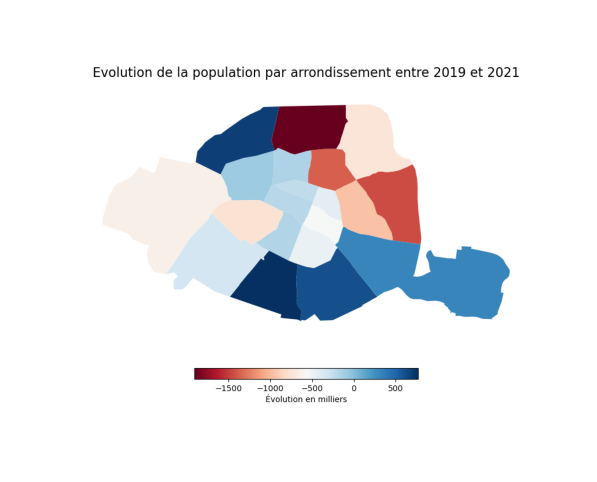

In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_population_niveau.png"))
plt.axis("off")

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/evolution_population_avec_contrib.png"))
plt.axis("off")

Cependant, on regarde également l'évolution de la population en pourcentage car elle donne une meilleure approche de l'évolution démographique de Paris que celle en nombre d'habitants. On observe que les arrondissements qui gagnent des habitants ne voient leur population augmenter au maximum que de 1,5%. En revanche ceux qui en perdent peuvent voir leur population baisser jusqu'à 5% sur la période. 

On voit de plus que les arrondissements du centre de Paris qui semblaient moins touchés que le Nord Ouest par la baisse de leur population en valeur brute sont en réalité parmi les arrondissements les plus touchés. Cette baisse est plus parlante en % car ces arrondissements étant plus petits (en superficie) que ceux du Nord, la perte d'un habitant est plus  relativement plus importante pour eux. 

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_population_pourcentage.png"))
plt.axis("off")


#### b. Focus sur la pyramide des âges 



In [18]:
os.makedirs(os.path.join(os.getcwd(), "graphs/Pyramides des âges 2019"))
os.makedirs(os.path.join(os.getcwd(), "graphs/Pyramides des âges 2020"))
os.makedirs(os.path.join(os.getcwd(), "graphs/Pyramides des âges 2021"))

In [19]:
%%capture
from scripts import stats_ages

Si on observe que Paris perd des habitants et que cette évolution n'est pas uniforme parmi les arrondissements, on voit aussi sur le graphique ci dessous que cette baisse n'est pas non plus uniforme parmi toutes les classes d'âges. Dans l'ensemble, Paris a perdu entre 2019 et 2021 des enfants (0 - 11 ans ), ce qui est en accord avec la suite, et des personnes âgées entre 30 et 60 ans. Paris perd des travailleurs et gagne des retraités. 

On peut noter que Paris perd des personnes en âge d'avoir des enfants (30 - 40 ans), ce qui peut être lié à la perte d'enfants par Paris. 

(np.float64(-0.5), np.float64(999.5), np.float64(599.5), np.float64(-0.5))

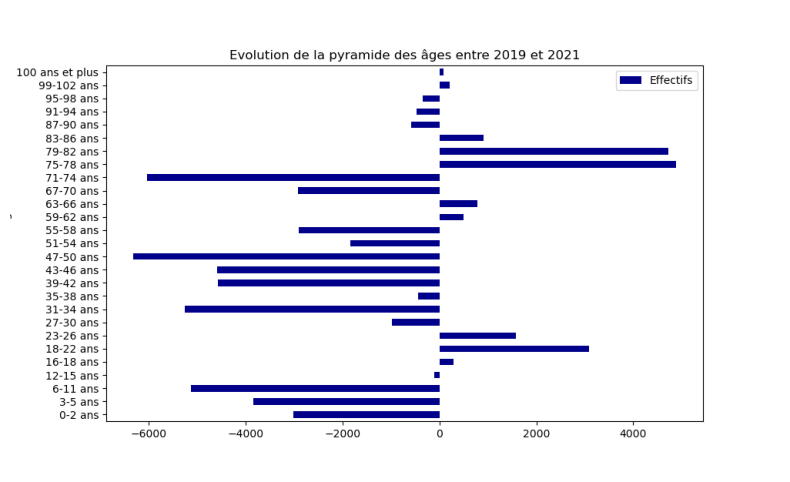

In [22]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/Pyramide_Paris_ecart1921.png"))
plt.axis("off")

Cependant on observe sur la figure suivante que les personnes âgées de 27 à 34 ans demeurent les personnes les plus nombreuses à Paris en 2021 malgré cette baisse observée depuis 2019. 

<Axes: title={'center': 'Pyramide des âges de Paris en 2021'}, ylabel="Tranche d'âge">

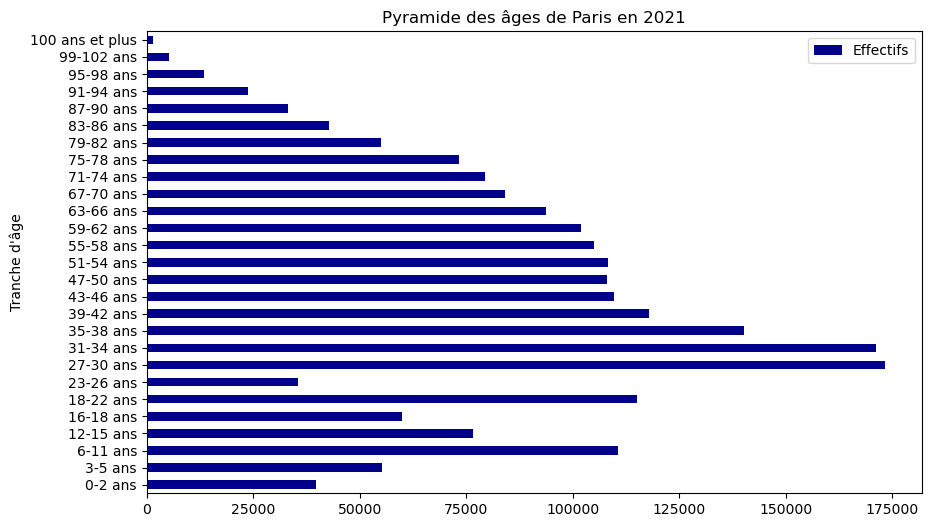

In [23]:
pyramide_2021 = stats_ages.Pyramid_2021.to_frame(name="Effectifs")
pyramide_2021.plot(kind='barh', color='darkblue', figsize=(10, 6), title ='Pyramide des âges de Paris en 2021', ylabel = "Tranche d'âge") 

### B. L'évolution des effectifs scolaires par arrondissement entre 2019 et 2021
#### a. Au global 


In [ ]:
%%capture
from scripts import stats_descr_effectif ;

D'après le tableau ci-dessous, on observe que Paris a perdu des élèves sur la période étudiée. La baisse ne se réparti pas de la même manière entre 2019-2020 et 2020-2021. La baisse est en l'occurrence plus importante après la Covid, même s'il ne nous est pas possible de conclure sur une éventuelle causalité. Sur le graphique suivant on observe bien que cette évolution, bien qu'allant dans le même sens pour tous les arrondissements, n'est pas la même pour tous d'une année à l'autre. 

In [ ]:
print("Tableau de la baisse du nombre d'élèves")
print(stats_descr_effectif.table_pertes_df)

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/evolution_effectif_avec_contrib.png"))
plt.axis("off")

On observe effectivement ces résultats sur une carte par arrondissement. Contrairement à la population totale dont l'évolution est positive ou négative en fonction des arrondissements, ici tous les arrondissements ont perdu des élèves entre 2019 et 2021. 

En regardant également l'évolution des effectifs scolaires en pourcentage on remarque que, même si les effectifs scolaires n'évoluent pas exactement de la même manière que la population totale, l'importance des évolutions sont similaires entre les deux variables. Autrement dit c'est principalement le Nord Ouest parisien qui perd à la fois des habitants et des élèves (ici jusqu'à 12% de perte d'effectifs scolaires sur la période). 

On observe la même chose pour les arrondissements du centre en ce qui concerne la population et les effectifs scolaires. La baisse en valeur brute est moins importante pour ces arrondissements que pour les autres mais en pourcentage cette baisse est plus importante que pour les autres, à l'exception des arrondissements du Nord Ouest. 

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_effectifs_niveau.png"))
plt.axis("off")

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(mpimg.imread("graphs/carte_evol_effectifs_pourcentage.png"))
plt.axis("off")

## 4. Modelisation 

On cherche donc à modéliser l'évolution des effectifs scolaires sur la période, et à tenter de trouver des variables corrélées à cette variable d'intérêt. En effet, la dimension causale de notre étude est limitée puisqu'il ne nous est pas possible de construire une expérience quasi aléatoire. Cependant, on conduit la régression suivante :
$$
effectifs\_scolaires _{i,t} = \alpha + \beta_1 \times prop\_T3_{i,t} + \beta_2 \times prop\_bac\_plus5_{i,t} + \beta_3 \times prop\_30\_40\_ans_{i,t} + \gamma \times X + \epsilon_{i,t}
$$
où $prop\_T3_{i,t}$ est la proportion d'appartements de 3 pièces ou plus (T3) dans l'arrondissement, $prop\_bac\_plus5_{i,t}$ la proportion de personnes ayant un diplôme de niveau bac + 5 dans l'arrondissement, $prop\_30\_40\_ans_{i,t}$ la proportion de personnes âgées de 30 à 40 ans dans l'arrondissement. $X$ est un vecteur de variables de contrôles, notamment des variables indicatrices pour la zone dans laquelle se situe l'arrondissement : nord-est, nord-ouest, sud-est, sud-ouest. 

La variable $prop\_30\_40\_ans_{i,t}$ est notre principale variable d'intérêt. Il paraît aussi intéressant d'inclure les deux autres car la variable $prop\_T3_{i,t}$ peut être un facteur d'installation de familles dans un arrondissement, donc de scolarisation de ces enfants. La variable $prop\_bac\_plus5_{i,t}$ peut être un facteur de baisse de ces effectifs scolaires car l'âge du premier enfant (et donc le moment de leur scolarisation) diminue avec le niveau de diplôme. Un arrondissement avec une proportion plus importante de personnes diplômées d'un bac + 5 dans l'arrondissement peut donc être moins doté en élèves qu'un autre arrondissement avec une proportion plus faible. 

In [ ]:
%%capture
from scripts import regressions

En estimant chaque modèle d'abord sur chaque année de manière séparée (sans le t dans la régression présentée plus haut), on observe des résultats concordant avec ce qui était attendu. Les variables $prop\_30\_40\_ans_{i}$ et $prop\_T3_{i}$ ont bien un effet positif sur le nombre d'élèves dans l'arrondissement, et ce de manière significative. Ainsi le nombre d'élèves dans un arrondissement augmente quand la proportion de T3 et/ou la proportion de personnes âgées entre 30 et 40 ans augmentent. 

De même la variable $prop\_bac\_plus5_{i}$ a bien un effet négatif sur le nombre d'élèves dans l'arrondissement mais cet effet n'est pas significatif à aucun seuil et pour aucune année. 

In [ ]:
import pandas as pd
print("Tableau synthétic de la régression pour l'année 2019")
print(pd.DataFrame({ "Coefficients": regressions.model_2019.fit().params, "P-value": regressions.model_2019.fit().pvalues}))
print("Tableau synthétic de la régression pour l'année 2020")
print(pd.DataFrame({ "Coefficients": regressions.model_2020.fit().params, "P-value": regressions.model_2020.fit().pvalues}))
print("Tableau synthétic de la régression pour l'année 2021")
print(pd.DataFrame({ "Coefficients": regressions.model_2021.fit().params, "P-value": regressions.model_2021.fit().pvalues}))

In [ ]:
%%capture
from scripts import regressions_effectifs

In [ ]:
import pandas as pd
print(pd.DataFrame({ "Coefficients": regressions_effectifs.model_effectifs_absolus.fit().params, "P-value": regressions_effectifs.model_effectifs_absolus.fit().pvalues}))

On observe d'après les résultats suivants que la proportion d'adultes âgés de 30 à 40 ans a un impact positif et significatif sur les effectifs scolaires, tout comme la proportion d'appartements de 3 pièces ou plus. Cela signifie que si la proportion d'adultes âgés de 30 à 40 ans augmente dans l'arrondissement, les effectifs scolaires augmentent. Or on sait que le nombre d'adultes âgés de 30 à 40 ans a diminué à Paris sur la période étudiée, ce qui indique le sens de variation des effectifs scolaires constaté entre 2019 et 2021. 

In [ ]:
print(pd.DataFrame({ "Coefficients": regressions_effectifs.model_effectifs_absolus_zone.fit().params, "P-value": regressions_effectifs.model_effectifs_absolus_zone.fit().pvalues}))

`Je ne sais pas quelles régressions il est utile de mettre et de commenter`

In [ ]:
%%capture
from scripts import regressions_ratios

In [ ]:
import pandas as pd
print(pd.DataFrame({ "Coefficients": regressions_ratios.model_avec_ratios.fit().params, "P-value": regressions_ratios.model_avec_ratios.fit().pvalues}))

## 5. Conclusion


`Conclusion à faire`